# Dragon Real Estate

In [45]:
import pandas as pd

In [46]:
housing = pd.read_csv("data.csv")
housing.head()
housing.info()
housing['CHAS'].value_counts()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   MOX          506 non-null    float64
 5   RM           501 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  1 non-null      object 
dtypes: float64(12), int64(3), object(1)
memory usage: 63.4+ KB


,CRIM,ZN,INDUS,CHAS,MOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284453,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.691016,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN


In [47]:
housing['CHAS'].value_counts()


CHAS
0    471
1     35
Name: count, dtype: int64

In [48]:
# import matplotlib.pyplot as plt
# housing.hist(bins = 50,figsize=(20,15))

In [49]:
import numpy as np

# train test splitting

In [50]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size= int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set, test_set = split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [51]:
print("rows in train set " ,len(train_set),"\nrows in test set ",len(test_set))

rows in train set  405 
rows in test set  101


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_set,test_set = train_test_split(housing,test_size=0.2, random_state=42)
print("rows in train set " ,len(train_set),"\nrows in test set ",len(test_set))

rows in train set  404 
rows in test set  102


In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [55]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [56]:
housing = strat_train_set.copy()

# Lookingt for correlations 

In [57]:
corr_matrix = housing.select_dtypes(include=[float, int]).corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV           1.000000
RM             0.672617
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
CRIM          -0.393715
MOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
LSTAT         -0.740494
Unnamed: 14         NaN
Name: MEDV, dtype: float64

In [58]:
# from pandas.plotting import scatter_matrix
# attributes = ["RM","ZN","MEDV","LSTAT"]
# scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

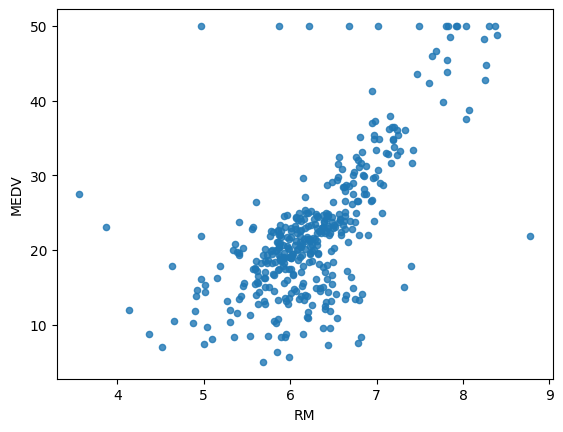

In [59]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [60]:
housing["TAXRM"]= housing["TAX"]/housing["RM"]
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

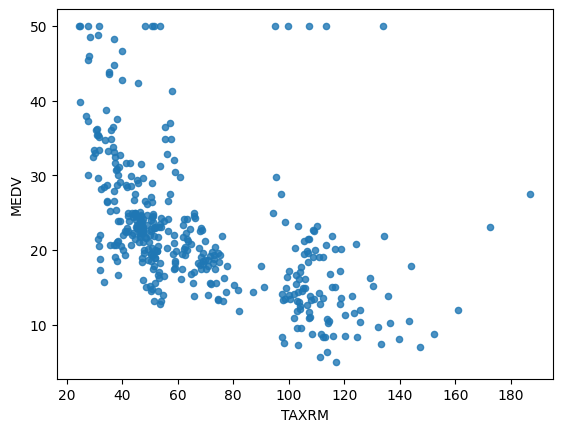

In [61]:
housing.plot(kind = "scatter", x ="TAXRM", y = "MEDV",alpha=0.8)

In [62]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing attributes

In [63]:
# Delete the blocks in column RM where the data is NA
a = housing.dropna(subset=["RM"])
a.shape

(400, 15)

In [64]:
# Delete the entire column RM
housing.drop("RM",axis=1).shape

(404, 14)

In [65]:
# Fill the missing values with the median value
median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [66]:
housing.shape

(404, 15)

In [67]:
from sklearn.impute import SimpleImputer


In [68]:
housing = housing.dropna(axis=1, how="all")

# Keep only numeric columns
housing_numeric = housing.select_dtypes(include=["number"])

# Create and fit imputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_numeric)



SimpleImputer(strategy='median')

In [69]:
# Transform the data
X = imputer.transform(housing_numeric)

In [70]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [71]:
housing_tr = pd.DataFrame(X, columns= housing_numeric.columns)

In [72]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,MOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.273631,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.702532,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit Learn Design

## Feature Scaling

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [74]:
housing_num_tr = my_pipeline.fit_transform(housing_numeric)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

## Selecting a desired model for Dragon Real Estates

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [76]:
some_data = housing_numeric.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [77]:
prepared_data = my_pipeline.transform(some_data)

In [78]:
model.predict(prepared_data)

array([22.551, 25.363, 16.29 , 23.368, 23.337])

In [79]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [80]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)


In [81]:
mse

1.5516707673267316

## using better evaaluation technique

In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [83]:
rmse_scores

array([2.94165357, 2.58296156, 4.40445166, 2.49053617, 3.09545677,
       2.67047776, 6.09352001, 3.34394181, 3.02024943, 3.46600869])

In [84]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [85]:
print_scores(rmse_scores)

Scores: [2.94165357 2.58296156 4.40445166 2.49053617 3.09545677 2.67047776
 6.09352001 3.34394181 3.02024943 3.46600869]
Mean: 3.410925743300921
Standard deviation: 1.036542166834558


# Saving the model

In [86]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model

In [88]:
X_test = strat_test_set.drop("MEDV",axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Unnamed: 14
- Unnamed: 15
